<a href="https://colab.research.google.com/github/malikbaqi12/Applied-data-science-using-pyspark-code-files/blob/main/zameen_com_dataset_analysis_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd


In [2]:
# get the data from txt files to pandas dataffame
df = pd.read_csv('zameen-updated.csv',  delimiter=',')
df.head(100)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2502517,1230,https://www.zameen.com/Property/millat_town_cl...,House,25000000,Millat Town,Faisalabad,Punjab,31.490612,73.106470,6,1.2 Kanal,For Sale,5,07-03-2019,NaN,NaN,Kanal,1.2,1-5 Kanal
96,2799588,5036,https://www.zameen.com/Property/faisalabad_raz...,House,6000000,Raza Abad,Faisalabad,Punjab,31.425990,73.048217,2,2.5 Marla,For Sale,4,06-19-2019,NaN,NaN,Marla,2.5,0-5 Marla
97,3130278,419,https://www.zameen.com/Property/satiana_road_t...,House,60000000,Satiana Road,Faisalabad,Punjab,31.372179,73.125594,6,1.6 Kanal,For Sale,6,02-17-2019,Ibraheem Associates,Miss Noor ul Huda,Kanal,1.6,1-5 Kanal
98,425947,1406,https://www.zameen.com/Property/rawalpindi_hum...,House,13500000,Humak,Rawalpindi,Punjab,33.538462,73.144913,4,7 Marla,For Sale,5,04-05-2019,NaN,NaN,Marla,7.0,5-10 Marla


In [3]:
df.shape

(168446, 20)

In [4]:

#dff = dff.drop(['property_id', 'location_id'])
dff=df.dropna()
dff.shape

(124374, 20)

In [5]:
dff = dff[dff["purpose"] == "For Sale"] 
(dff["baths"].unique())



array([  3,   2,   7,   5,   1,   0,  10,   4,   6,   8,   9,  11,  13,
        12, 403,  14])

In [6]:
dff.drop(dff[dff['baths'] == 403].index, inplace = True)

In [7]:

(dff["bedrooms"].unique())


array([ 3,  2,  7,  5,  1,  0, 10,  4,  6,  8,  9, 11, 14, 12, 15, 16, 13,
       18, 25, 27])

In [8]:
dff.drop(dff[dff['bedrooms'] >= 15].index, inplace = True)

In [9]:
(dff["Area Type"].unique())


array(['Marla', 'Kanal'], dtype=object)

In [10]:
Area_in_marla=dff[['Area Type','Area Size']].apply(lambda x: x['Area Size']*20 if x['Area Type'] in ['Kanal'] else x, axis=1)
Area_in_marla.drop(['Area Type'],axis=1,inplace=True)
Area_in_marla.rename(columns={'Area Size':'Area_in_Marla'},inplace=True)
dff=pd.concat([dff,Area_in_marla],axis=1)

In [11]:
header=['property_type','price','location','city','Area_in_Marla','bedrooms','baths','purpose']

In [12]:
dff = dff[header]
dff.head()

,property_type,price,location,city,Area_in_Marla,bedrooms,baths,purpose
4,House,7000000,DHA Defence,Islamabad,8.0,3,3,For Sale
7,Flat,7800000,E-11,Islamabad,6.2,2,2,For Sale
8,House,50000000,DHA Defence,Islamabad,20.0,7,7,For Sale
9,Penthouse,40000000,F-11,Islamabad,20.0,5,5,For Sale
10,Flat,35000000,Diplomatic Enclave,Islamabad,7.1,3,3,For Sale


In [13]:
dff.head()

,property_type,price,location,city,Area_in_Marla,bedrooms,baths,purpose
4,House,7000000,DHA Defence,Islamabad,8.0,3,3,For Sale
7,Flat,7800000,E-11,Islamabad,6.2,2,2,For Sale
8,House,50000000,DHA Defence,Islamabad,20.0,7,7,For Sale
9,Penthouse,40000000,F-11,Islamabad,20.0,5,5,For Sale
10,Flat,35000000,Diplomatic Enclave,Islamabad,7.1,3,3,For Sale


In [14]:
# dff.loc[:,'Area Size'] *= 20

In [15]:
# dff_kanal.head()

In [16]:

# calculate a 5-number summary
from numpy import percentile
# calculate quartiles
quartiles = percentile(dff["Area_in_Marla"], [25, 50, 75])
# calculate min/max
dff_A_min, dff_A_max = dff["Area_in_Marla"].min(), dff["Area_in_Marla"].max()
# print 5-number summary
print('Min: %.3f' % dff_A_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % dff_A_max)

Min: 0.000
Q1: 4.800
Median: 7.000
Q3: 11.000
Max: 8320.000


In [17]:
dff.drop(dff[dff['Area_in_Marla'] > 20].index, inplace = True)

In [18]:
print(dff[dff['Area_in_Marla'] > 500])


Empty DataFrame
Columns: [property_type, price, location, city, Area_in_Marla, bedrooms, baths, purpose]
Index: []


In [19]:
quartiles = percentile(dff["price"], [25, 50, 75])
# calculate min/max
dff_P_min, dff_P_max = dff["price"].min(), dff["price"].max()
# print 5-number summary
print('Min: %.3f' % dff_P_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % dff_P_max)

Min: 0.000
Q1: 7500000.000
Median: 14000000.000
Q3: 25000000.000
Max: 935000000.000


In [20]:
dff.drop(dff[dff['price'] > 20000000].index, inplace = True)

In [21]:
quartiles = percentile(dff["price"], [25, 50, 75])
# calculate min/max
dff_P_min, dff_P_max = dff["price"].min(), dff["price"].max()
# print 5-number summary
print('Min: %.3f' % dff_P_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % dff_P_max)

Min: 0.000
Q1: 6000000.000
Median: 9500000.000
Q3: 14000000.000
Max: 20000000.000


In [22]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
price,56640.0,1.008180e+07,4.908033e+06,0.0,6000000.0,9500000.0,14000000.0,20000000.0
Area_in_Marla,56640.0,5.694760e+00,2.773949e+00,0.0,4.0,5.0,7.0,20.0
bedrooms,56640.0,2.693362e+00,1.501368e+00,0.0,2.0,3.0,3.0,13.0
baths,56640.0,2.303884e+00,1.846669e+00,0.0,0.0,2.0,3.0,10.0


In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-24-2b04d34005e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(), cmap="RdBu")


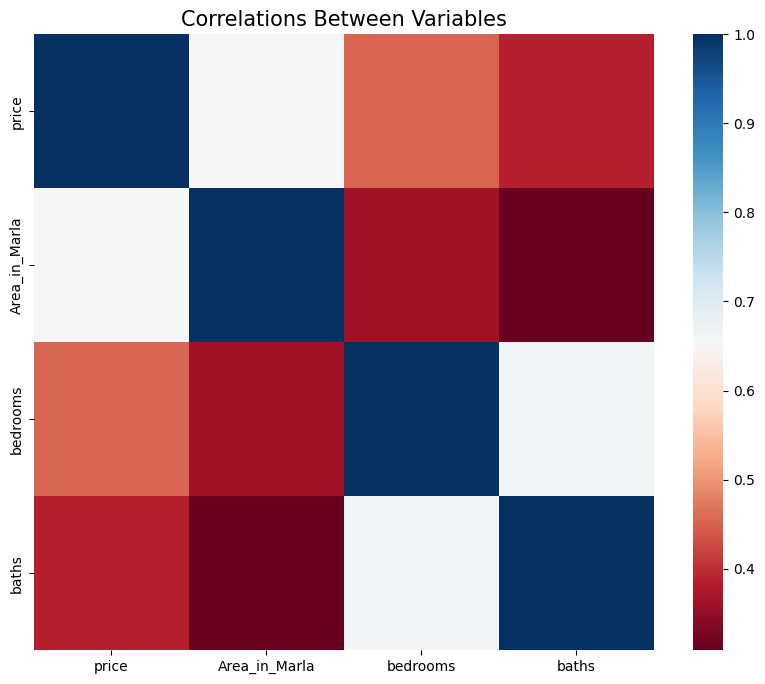

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(dff.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

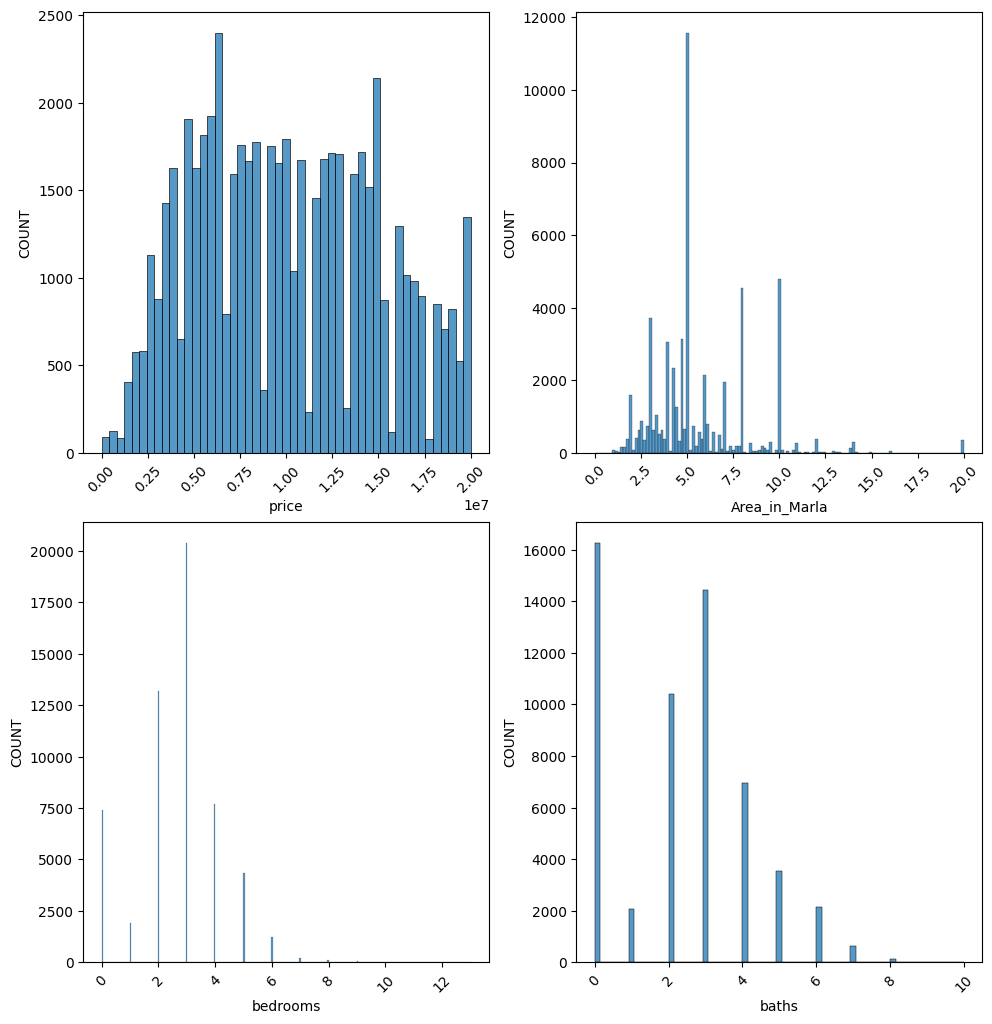

In [25]:
fig = plt.figure(figsize=(10,20))
num_vars = dff.select_dtypes(['int64', 'float64']).columns.tolist()
#num_vars.remove('Id')
for index, col in enumerate(num_vars):
    plt.subplot(4,2,index+1)
    sns.histplot(x=col, data=dff)
    plt.ylabel('COUNT', size = 10)
    plt.xlabel(col, fontsize = 10)
    plt.xticks(size = 10, rotation = 45 )
    plt.yticks(size = 10)
fig.tight_layout(pad=1.0)

In [26]:
dff.isna().sum()

property_type    0
price            0
location         0
city             0
Area_in_Marla    0
bedrooms         0
baths            0
purpose          0
dtype: int64

In [27]:

# df_lhr = dff[dff["city"] == "Lahore"] 
# df_isb = dff[dff["city"] == "Islamabad"] 
# df_Fsb = dff[dff["city"] == "Faisalabad"] 
# df_Rwp = dff[dff["city"] == "Rawalpindi"] 
# df_khi = dff[dff["city"] == "Karachi"] 

In [28]:
# print(df_lhr.shape)
# print(df_isb.shape)
# print(df_Fsb.shape)
# print(df_Rwp.shape)
# print(df_khi.shape)

In [29]:

df_Rent = dff[dff["purpose"] == "For Rent"] 
df_Sale = dff[dff["purpose"] == "For Sale"] 
print(df_Sale.shape)
df_Sale.head()

(56640, 8)


,property_type,price,location,city,Area_in_Marla,bedrooms,baths,purpose
4,House,7000000,DHA Defence,Islamabad,8.0,3,3,For Sale
7,Flat,7800000,E-11,Islamabad,6.2,2,2,For Sale
14,Flat,3600000,E-11,Islamabad,3.1,1,1,For Sale
15,Flat,5000000,E-11,Islamabad,4.0,2,2,For Sale
16,House,19000000,DHA Defence,Islamabad,10.0,3,3,For Sale


In [30]:
# MOdel Building

In [31]:
X_in=df_Sale.drop(['price'],axis=1)

In [32]:
Y_Out=df_Sale.iloc[:,1:2]

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [34]:
ohe = OneHotEncoder()
imp = SimpleImputer()

In [35]:
ct = make_column_transformer(
    (ohe,['location','property_type','city','purpose']),
    (imp,['Area_in_Marla','bedrooms','baths']),
    remainder='passthrough'
)

In [36]:
x = ct.fit_transform(X_in)

In [37]:
x

<56640x964 sparse matrix of type '<class 'numpy.float64'>'
	with 372775 stored elements in Compressed Sparse Row format>

In [38]:
# one hot Encoding

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,Y_Out,test_size=0.2,random_state=42)

In [40]:
#Starting with linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [41]:
linear_model=model.score(X_test,y_test)
print("Linear Model Score:",linear_model)

Linear Model Score: 0.7029825867171935


In [42]:
from sklearn import tree
dt_model=tree.DecisionTreeRegressor(criterion='squared_error',max_depth=3,max_leaf_nodes=5)
dt_model.fit(X_train,y_train)
dt_score=dt_model.score(X_test,y_test)
print("Decision Tree model score:",dt_score)

Decision Tree model score: 0.5355322974138448


In [43]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5,
                              weights='distance')
knn_model.fit(X_train,y_train)
knn_score=knn_model.score(X_test,y_test)
print("KNN score:",knn_score)

KNN score: 0.8062697437417417


In [44]:
from sklearn.compose import ColumnTransformer
ct = make_column_transformer(
    (ohe,['location','property_type','city','purpose']),
    (imp,['Area_in_Marla','bedrooms','baths']),
    remainder='passthrough'
)

In [45]:
# #Prediction
# input_data=[['House','Wazir Town','Rawalpindi','4','For Sale','3','165.9']]
# input_data1=pd.DataFrame(input_data,columns=['property_type'	,'location',	'city'	,'baths'	,'purpose'	,'bedrooms',	'Area_in_Marla'])
# ct = make_column_transformer(
#     (ohe,['location','property_type','city','purpose']),
#     (imp,['Area_in_Marla','bedrooms','baths']),
#     remainder='passthrough'
# )
# input_data2=ct.fit_transform(input_data1)

# input_data2

In [46]:
def predict_price(location,Area_in_Marla,bedrooms, baths, purpose, citylabel,propertyEncoded):   
    loc_index = np.where(X_in.columns==location)[0][0] 

    x = np.zeros(len(X_in.columns))
    x[0] = location
    x[1] = Area_in_Marla
    x[2] = bedrooms
    x[3] = baths
    x[4] = purpose
    x[5] = citylabel
    x[6] = propertyEncoded
    if loc_index >= 0:
        x[loc_index] = 1

    return knn_model.predict([x])[0]

In [47]:
X_in.columns

Index(['property_type', 'location', 'city', 'Area_in_Marla', 'bedrooms',
       'baths', 'purpose'],
      dtype='object')

In [48]:
# predict_price( 'DHA Defence',10,6,6,4,1,1,)

In [49]:
#  ht = { 'F' : 'Flat', 'T' : 'Terraced', 'S' : 'Semi', 'D' : 'Detached', 'O' : 'Other'}

# def house_type(description,lat,lon,price):
   # features = [[lat,lon,price]]
    # print("{:30s} {:5.0f}k -> {}".format(description,price,ht[(model.predict(features)[0])]))

# house_type('Oxford Circus, London', 51.515276, -0.142038, 500)
# house_type('Harrods (B. Road), London', 51.499814, -0.163366, 5500)
# house_type('Peak District, National Park', 53.328508, -1.783416, 100) 


In [50]:
def house_type(description, lat, lon, price, bedrooms):
    features = [[lat, lon, price, bedrooms]]
    print("{:30s} {:5.0f}k -> {}".format(description, price, ht[(model.predict(features)[0])]))


In [51]:
# house_type('Oxford Circus, London', 51.515276, -0.142038, 500, 2)
# house_type('Harrods (B. Road), London', 51.499814, -0.163366, 5500, 3)
# house_type('Peak District, National Park', 53.328508, -1.783416, 100, 1)


In [52]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
